[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
             tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]
6.0
4.0
<class 'numpy.ndarray'>
2301
[0.7800816797213191, 0.625677690958504]
(14640, 2301)
(14640,)
              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1870
     neutral       0.43      0.50      0.46       614
    positive       0.68      0.50      0.58       444

    accuracy                           0.69      2928
   macro avg       0.64      0.60      0.61      2928
weighted avg       0.70      0.69      0.70      2928

KNN Accuracy Score ->  69.43306010928961


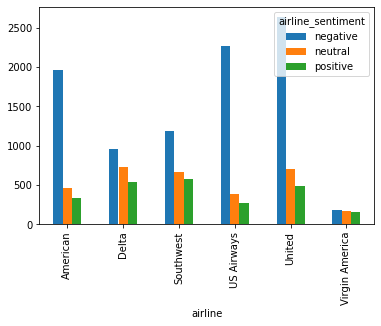

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 26 01:14:40 2020

@author: ccc
"""

import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("stopwords")

data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
print(airline_tweets.head())
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])


airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier 

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

print(type(processed_features))
print(len(vectorizer.get_feature_names()))
print([i for i in processed_features[0] if not i == 0 ])
print(processed_features.shape)
print(labels.shape)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions_knn = knn.predict(X_test)
# Use accuracy_score function to get the accuracy
print(classification_report(y_test,predictions_knn))
print("KNN Accuracy Score -> ",accuracy_score(predictions_knn, y_test)*100)

In [1]:
!ls

sample_data


In [ ]:
import keras
